<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST1] - Simple classification with DNN
<!-- DESC --> An example of classification using a dense neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.14
Notebook id          : MNIST1
Run time             : Wednesday 10 February 2021, 09:10:05
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

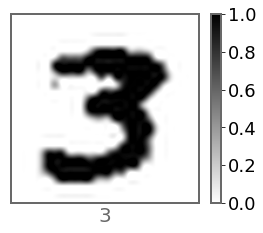

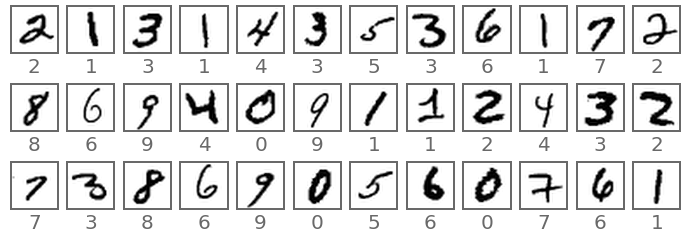

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Train the model

In [6]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 1:28 - loss: 2.4354 - accuracy: 0.1270

 30/118 [======>.......................] - ETA: 0s - loss: 1.7806 - accuracy: 0.4656  

 60/118 [==============>...............] - ETA: 0s - loss: 1.4039 - accuracy: 0.5930

 90/118 [=====================>........] - ETA: 0s - loss: 1.1861 - accuracy: 0.6599

118/118 [==============================] - 2s 9ms/step - loss: 1.0492 - accuracy: 0.7008 - val_loss: 0.2544 - val_accuracy: 0.9281


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.2385 - accuracy: 0.9316

 30/118 [======>.......................] - ETA: 0s - loss: 0.2530 - accuracy: 0.9289

 60/118 [==============>...............] - ETA: 0s - loss: 0.2495 - accuracy: 0.9293

 91/118 [======================>.......] - ETA: 0s - loss: 0.2454 - accuracy: 0.9302

118/118 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9312 - val_loss: 0.1856 - val_accuracy: 0.9454


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.1914 - accuracy: 0.9414

 32/118 [=======>......................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9447

 62/118 [==============>...............] - ETA: 0s - loss: 0.1839 - accuracy: 0.9461

 93/118 [======================>.......] - ETA: 0s - loss: 0.1816 - accuracy: 0.9470

118/118 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9478 - val_loss: 0.1568 - val_accuracy: 0.9543


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.1150 - accuracy: 0.9668

 31/118 [======>.......................] - ETA: 0s - loss: 0.1383 - accuracy: 0.9615

 61/118 [==============>...............] - ETA: 0s - loss: 0.1380 - accuracy: 0.9616

 92/118 [======================>.......] - ETA: 0s - loss: 0.1376 - accuracy: 0.9615

118/118 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9613 - val_loss: 0.1273 - val_accuracy: 0.9624


Epoch 5/16
  1/118 [..............................] - ETA: 0s - loss: 0.1343 - accuracy: 0.9707

 31/118 [======>.......................] - ETA: 0s - loss: 0.1140 - accuracy: 0.9667

 61/118 [==============>...............] - ETA: 0s - loss: 0.1144 - accuracy: 0.9663

 91/118 [======================>.......] - ETA: 0s - loss: 0.1143 - accuracy: 0.9663

118/118 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9663 - val_loss: 0.1136 - val_accuracy: 0.9649


Epoch 6/16
  1/118 [..............................] - ETA: 0s - loss: 0.0847 - accuracy: 0.9766

 31/118 [======>.......................] - ETA: 0s - loss: 0.1042 - accuracy: 0.9683

 62/118 [==============>...............] - ETA: 0s - loss: 0.1021 - accuracy: 0.9694

 92/118 [======================>.......] - ETA: 0s - loss: 0.1012 - accuracy: 0.9698

118/118 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9702 - val_loss: 0.1053 - val_accuracy: 0.9691


Epoch 7/16
  1/118 [..............................] - ETA: 0s - loss: 0.0678 - accuracy: 0.9766

 31/118 [======>.......................] - ETA: 0s - loss: 0.0788 - accuracy: 0.9762

 61/118 [==============>...............] - ETA: 0s - loss: 0.0792 - accuracy: 0.9767

 91/118 [======================>.......] - ETA: 0s - loss: 0.0800 - accuracy: 0.9767

118/118 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9764 - val_loss: 0.0970 - val_accuracy: 0.9713


Epoch 8/16
  1/118 [..............................] - ETA: 0s - loss: 0.0961 - accuracy: 0.9824

 31/118 [======>.......................] - ETA: 0s - loss: 0.0754 - accuracy: 0.9781

 61/118 [==============>...............] - ETA: 0s - loss: 0.0743 - accuracy: 0.9780

 91/118 [======================>.......] - ETA: 0s - loss: 0.0741 - accuracy: 0.9781

118/118 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9782 - val_loss: 0.0891 - val_accuracy: 0.9715


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.0722 - accuracy: 0.9746

 31/118 [======>.......................] - ETA: 0s - loss: 0.0585 - accuracy: 0.9817

 62/118 [==============>...............] - ETA: 0s - loss: 0.0588 - accuracy: 0.9821

 92/118 [======================>.......] - ETA: 0s - loss: 0.0594 - accuracy: 0.9821

118/118 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0813 - val_accuracy: 0.9749


Epoch 10/16
  1/118 [..............................] - ETA: 0s - loss: 0.0670 - accuracy: 0.9824

 31/118 [======>.......................] - ETA: 0s - loss: 0.0554 - accuracy: 0.9860

 61/118 [==============>...............] - ETA: 0s - loss: 0.0536 - accuracy: 0.9861

 91/118 [======================>.......] - ETA: 0s - loss: 0.0534 - accuracy: 0.9858

118/118 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9855 - val_loss: 0.0858 - val_accuracy: 0.9743


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.0561 - accuracy: 0.9727

 31/118 [======>.......................] - ETA: 0s - loss: 0.0452 - accuracy: 0.9865

 60/118 [==============>...............] - ETA: 0s - loss: 0.0467 - accuracy: 0.9862

 90/118 [=====================>........] - ETA: 0s - loss: 0.0473 - accuracy: 0.9860

118/118 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9859 - val_loss: 0.0780 - val_accuracy: 0.9766


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.0432 - accuracy: 0.9902

 31/118 [======>.......................] - ETA: 0s - loss: 0.0433 - accuracy: 0.9886

 61/118 [==============>...............] - ETA: 0s - loss: 0.0435 - accuracy: 0.9881

 91/118 [======================>.......] - ETA: 0s - loss: 0.0434 - accuracy: 0.9879

118/118 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9877 - val_loss: 0.0749 - val_accuracy: 0.9767


Epoch 13/16
  1/118 [..............................] - ETA: 0s - loss: 0.0644 - accuracy: 0.9863

 31/118 [======>.......................] - ETA: 0s - loss: 0.0359 - accuracy: 0.9909

 61/118 [==============>...............] - ETA: 0s - loss: 0.0358 - accuracy: 0.9906

 91/118 [======================>.......] - ETA: 0s - loss: 0.0364 - accuracy: 0.9903

118/118 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0743 - val_accuracy: 0.9780


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.0350 - accuracy: 0.9902

 31/118 [======>.......................] - ETA: 0s - loss: 0.0344 - accuracy: 0.9898

 61/118 [==============>...............] - ETA: 0s - loss: 0.0349 - accuracy: 0.9899

 90/118 [=====================>........] - ETA: 0s - loss: 0.0347 - accuracy: 0.9900

118/118 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9901 - val_loss: 0.0797 - val_accuracy: 0.9763


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.0261 - accuracy: 0.9922

 31/118 [======>.......................] - ETA: 0s - loss: 0.0325 - accuracy: 0.9902

 62/118 [==============>...............] - ETA: 0s - loss: 0.0331 - accuracy: 0.9903

 93/118 [======================>.......] - ETA: 0s - loss: 0.0331 - accuracy: 0.9905

118/118 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9907 - val_loss: 0.0718 - val_accuracy: 0.9786


Epoch 16/16
  1/118 [..............................] - ETA: 0s - loss: 0.0243 - accuracy: 0.9961

 31/118 [======>.......................] - ETA: 0s - loss: 0.0250 - accuracy: 0.9928

 61/118 [==============>...............] - ETA: 0s - loss: 0.0264 - accuracy: 0.9924

 91/118 [======================>.......] - ETA: 0s - loss: 0.0270 - accuracy: 0.9922

118/118 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9921 - val_loss: 0.0775 - val_accuracy: 0.9770


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.0774819478392601
Test accuracy : 0.9769999980926514


### 6.2 - Plot history

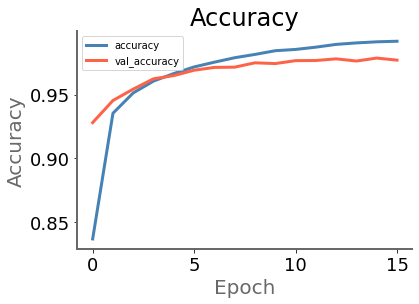

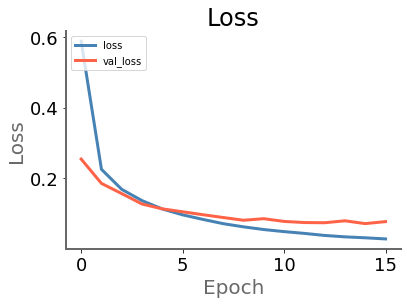

In [8]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

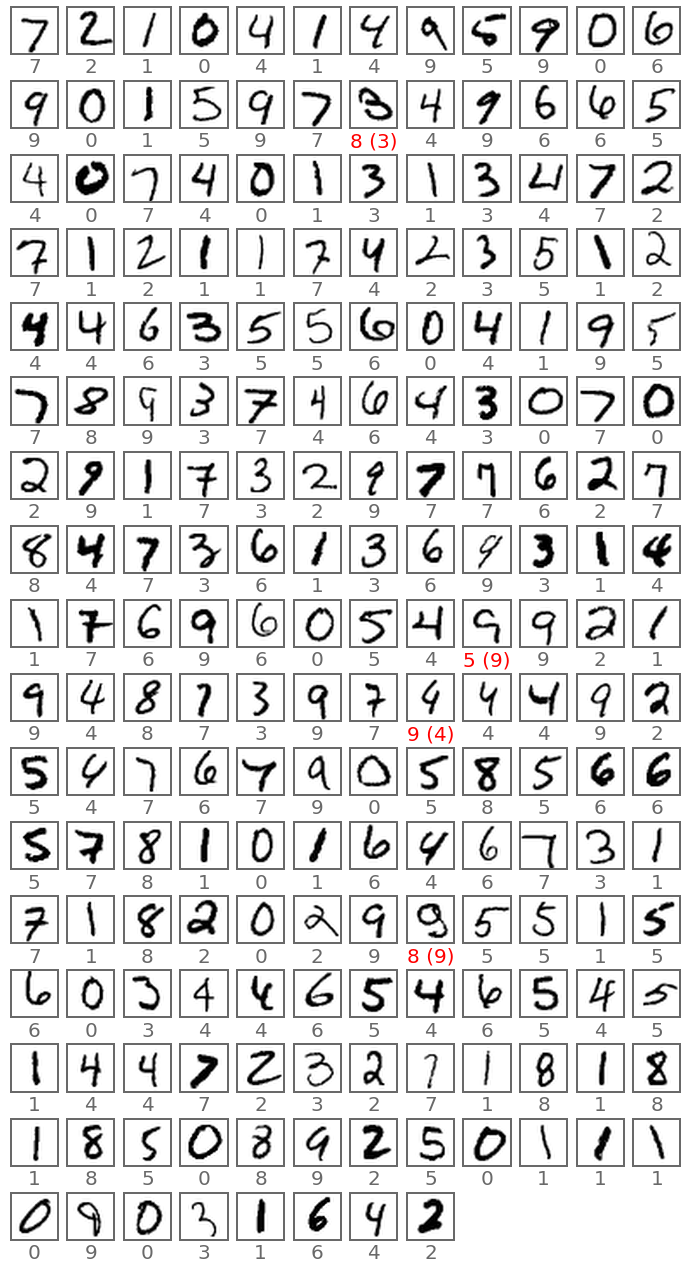

In [9]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

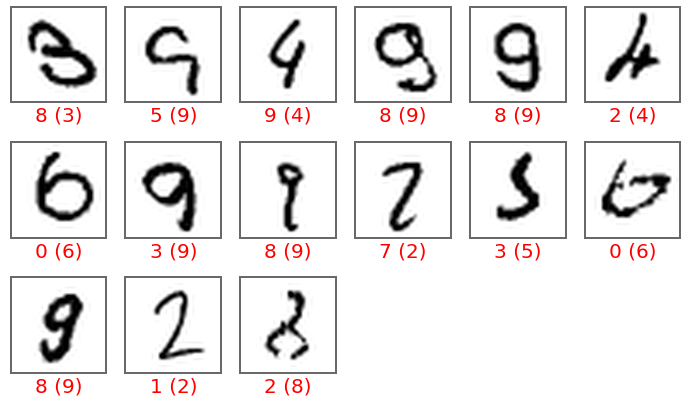

In [10]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

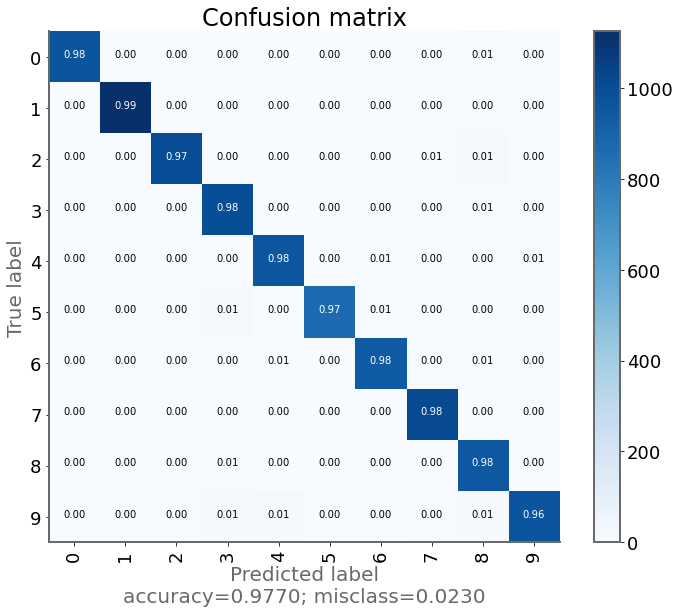

In [11]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [12]:
pwk.end()

End time is : Wednesday 10 February 2021, 09:10:47
Duration is : 00:00:42 247ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>